In [0]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

In [0]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

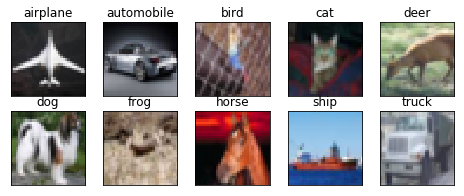

In [99]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [103]:
print(num_classes)

10


In [106]:
import keras
from keras import regularizers
from keras.optimizers import Adam
from keras.layers.convolutional import Conv2D, MaxPooling2D, SeparableConv2D, DepthwiseConv2D
from keras.layers import Input
from keras.utils import plot_model
from keras.models import Model
# from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.pooling import MaxPooling2D

#Define the model

opt_rms = keras.optimizers.rmsprop(lr=0.001,decay=1e-6)

visible = Input(shape=(32, 32, 3))

# Normal Convolution

conv1  = Conv2D(10, (3,3),  input_shape=(32,32,3))(visible) #30
conv1 = Activation('relu')(conv1)
conv1 = BatchNormalization()(conv1)
conv1 = Dropout(0.1)(conv1)

# Spatially Separable Convolution

conv2  = Conv2D(3, (3,1))(conv1) # 30x28
conv2  = Activation('relu')(conv2)
conv2  = BatchNormalization()(conv2)

conv3  = Conv2D(3, (1,3))(conv2) # 28x28
conv3  = Activation('relu')(conv3)
conv3  = BatchNormalization()(conv3)

# Depthwise Separable Convolution

conv4 = SeparableConv2D(32, (3,3))(conv3) #26
conv4 = Activation('relu')(conv4)
conv4 = BatchNormalization()(conv4)
conv4 = Dropout(0.1)(conv4)

# Grouped Convolution (use 3x3, 5x5 only)

# First we will convolve with 3x3 on conv4 and then with 5x5 on conv4 and merge them.

conv5 = SeparableConv2D(32, (3,3))(conv4) #26
conv5 = Activation('relu')(conv4)
conv5 = BatchNormalization()(conv4)
conv5 = Dropout(0.1)(conv4)

conv6 = SeparableConv2D(32, (5,5))(conv4) #26
conv6 = Activation('relu')(conv4)
conv6 = BatchNormalization()(conv4)
conv6 = Dropout(0.1)(conv4)

added = keras.layers.Add()([conv5, conv6]) #26

pool1 = MaxPooling2D(pool_size=(2,2))(added) #13
pool1 = Dropout(0.1)(pool1)
 
conv7 = Conv2D(16, (1, 1), activation="relu")(pool1) #13

# Grouped Convolution (use 3x3 only, one with dilation = 1, and another with dilation = 2) 

conv8  = Conv2D(32, (3,3),dilation_rate=(1, 1))(conv7) #11
conv8 = Activation('relu')(conv8)
conv8 = BatchNormalization()(conv8)
conv8= Dropout(0.1)(conv8)

conv9  = Conv2D(32, (3,3), dilation_rate=(2, 2))(conv8) #9
conv9 = Activation('relu')(conv9)
conv9 = BatchNormalization()(conv9)
conv9 = Dropout(0.1)(conv9)
 
conv10 = Conv2D(10, (7, 7), activation="relu")(conv9) #7

flat = Flatten()(conv10)
output = Activation('softmax')(flat)
model = Model(inputs=visible, outputs=output)
 
model.compile(loss='categorical_crossentropy', optimizer=opt_rms, metrics=['accuracy'])

#summarize layers
print(model.summary())

#plot graph
plot_model(model, to_file='model_plot.jpg', show_shapes=True)

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_24 (InputLayer)           (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv2d_135 (Conv2D)             (None, 30, 30, 10)   280         input_24[0][0]                   
__________________________________________________________________________________________________
activation_154 (Activation)     (None, 30, 30, 10)   0           conv2d_135[0][0]                 
__________________________________________________________________________________________________
batch_normalization_144 (BatchN (None, 30, 30, 10)   40          activation_154[0][0]             
__________________________________________________________________________________________________
dropout_11

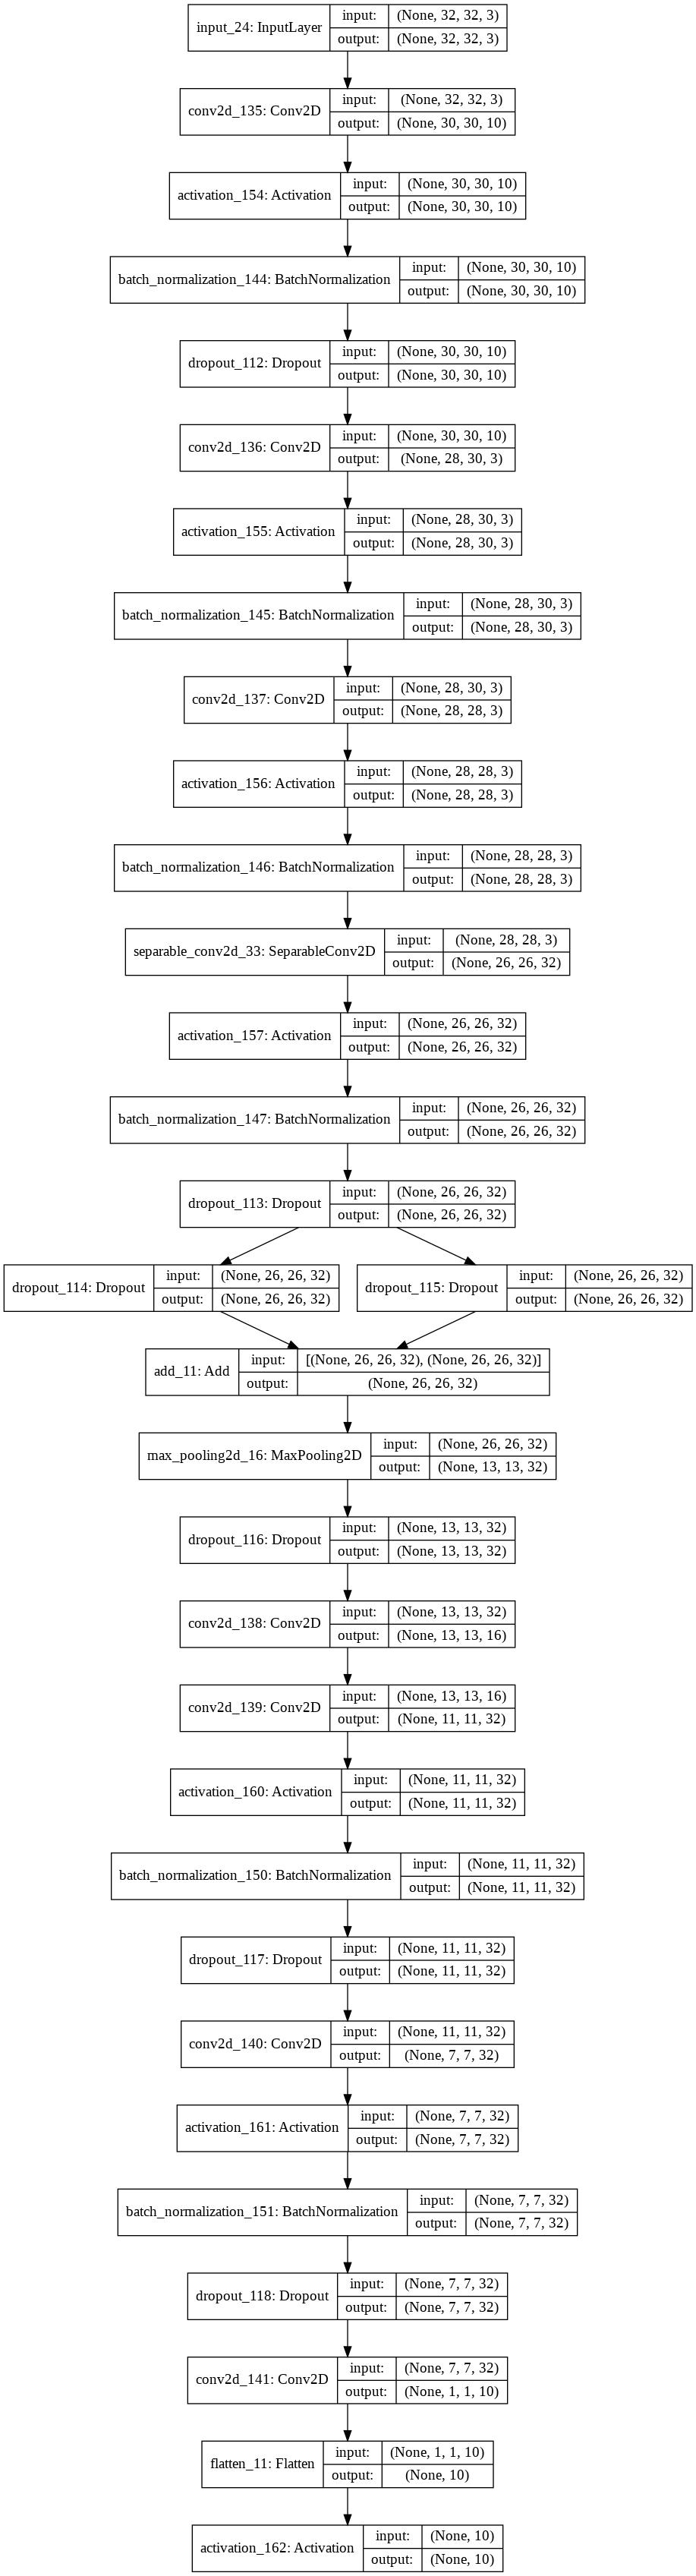

In [107]:
from IPython.display import Image, display
display(Image('model_plot.jpg'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, callbacks=[<keras.ca..., steps_per_epoch=390, epochs=75)`


Epoch 1/75

Epoch 00001: LearningRateScheduler setting learning rate to 0.001.
390/390 [==============================] - 16s 41ms/step - loss: 1.9098 - acc: 0.3281 - val_loss: 1.9437 - val_acc: 0.3403

Epoch 00001: val_acc improved from -inf to 0.34030, saving model to model_accuracy.best.hdf5
Epoch 2/75

Epoch 00002: LearningRateScheduler setting learning rate to 0.001.
390/390 [==============================] - 9s 23ms/step - loss: 1.5258 - acc: 0.4683 - val_loss: 1.5369 - val_acc: 0.4753

Epoch 00002: val_acc improved from 0.34030 to 0.47530, saving model to model_accuracy.best.hdf5
Epoch 3/75

Epoch 00003: LearningRateScheduler setting learning rate to 0.001.
390/390 [==============================] - 9s 23ms/step - loss: 1.3573 - acc: 0.5241 - val_loss: 1.5784 - val_acc: 0.4735

Epoch 00003: val_acc did not improve from 0.47530
Epoch 4/75

Epoch 00004: LearningRateScheduler setting learning rate to 0.001.
390/390 [==============================] - 9s 23ms/step - loss: 1.2431 - ac

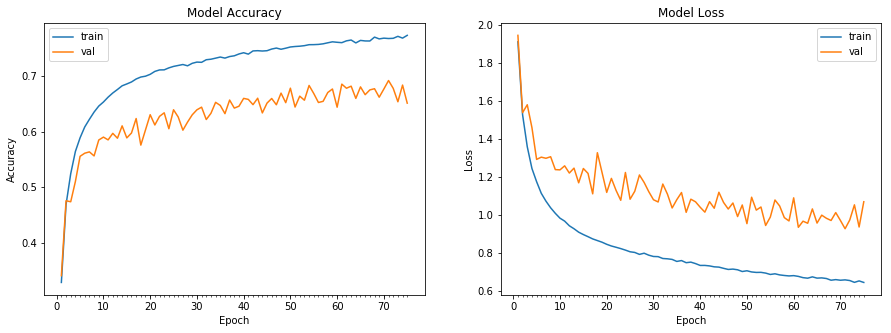

Accuracy on test data is: 65.12


In [108]:
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler
from keras.callbacks import ModelCheckpoint

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)

# Accuracy on test data is: 83.88
# def scheduler(epoch, lr):
#   return round(0.003 * 1/(1 + 0.319 * epoch), 10)

# Accuracy on test data is: 83.48
def lr_schedule(epoch):
    lrate = 0.001
    if epoch > 75:
        lrate = 0.0005
    if epoch > 100:
        lrate = 0.0003
    return lrate

filepath="model_accuracy.best.hdf5"

reduce_LR = LearningRateScheduler(lr_schedule, verbose=1)
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 75, 
                                 validation_data = (test_features, test_labels), verbose=1,
                                callbacks=[reduce_LR, checkpoint])
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))